In [4]:
#for plotting
import matplotlib.pyplot as plt
#for matrix operations
import numpy as np
#for random numbers
import random

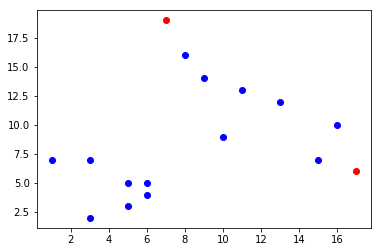

In [6]:
#toy data points, 2 clusters
x = [5, 6, 6, 5, 3, 1, 3, 11, 10, 15, 9, 8, 16, 13]
y = [3, 4, 5, 5, 2, 7, 7, 13, 9, 7, 14, 16, 10, 12]

#random centroid intialization
centroid_1 = [7, 19]
centroid_2 = [17, 6]

plt.plot(x, y, 'bo')
plt.plot(centroid_1[0], centroid_1[1], 'ro')
plt.plot(centroid_2[0], centroid_2[1], 'ro')
plt.show()

In [7]:
#Euclidian distance function
def euclidian(a, b):
    return np.linalg.norm(a-b)

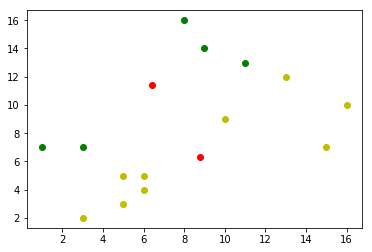

[[6.4, 11.4], [8.777777777777779, 6.333333333333333]]


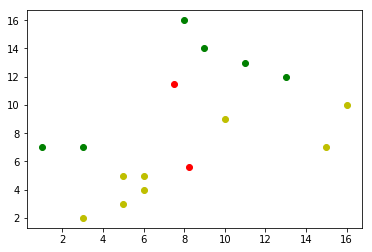

[[7.5, 11.5], [8.25, 5.625]]


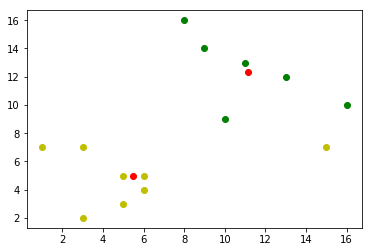

[[11.166666666666666, 12.333333333333334], [5.5, 5.0]]


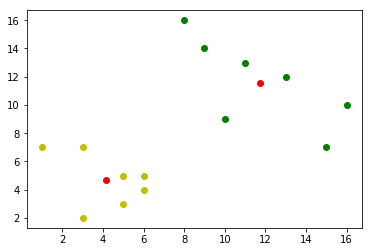

[[11.714285714285714, 11.571428571428571], [4.142857142857143, 4.714285714285714]]


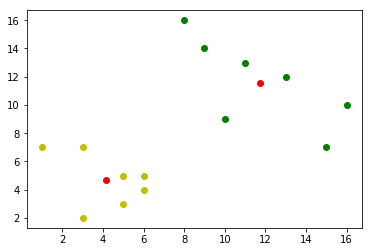

[[11.714285714285714, 11.571428571428571], [4.142857142857143, 4.714285714285714]]


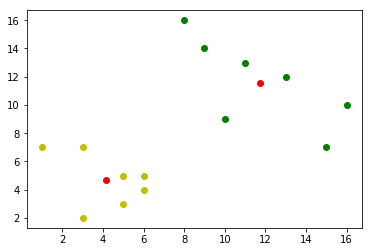

[[11.714285714285714, 11.571428571428571], [4.142857142857143, 4.714285714285714]]


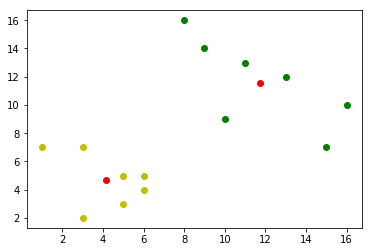

[[11.714285714285714, 11.571428571428571], [4.142857142857143, 4.714285714285714]]


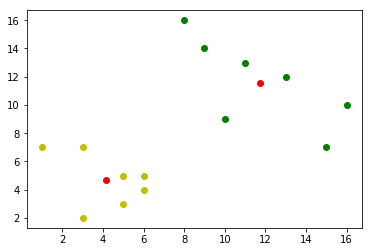

[[11.714285714285714, 11.571428571428571], [4.142857142857143, 4.714285714285714]]


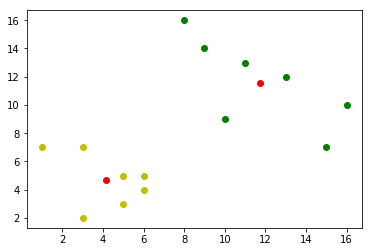

[[11.714285714285714, 11.571428571428571], [4.142857142857143, 4.714285714285714]]


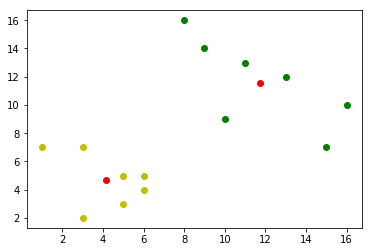

[[11.714285714285714, 11.571428571428571], [4.142857142857143, 4.714285714285714]]


In [8]:
#the main algorithm
def k_means_clustering(x, y, *centroids):
  #create temporary variable, for distance between points and centroids
  dist = []
  #get points zipped as (x, y) pairs
  points = list(zip(x, y))
  #temporary centroids
  tmp_centroids = centroids[:]
  #and means
  means = []
  #outer loop to perform constant update untill convergence
  for i in range(10):
    '''The algorithm logic is the following - first calculate distanses
    between every point and every centroid and append that data into distance var,
    then to find the index of minimum distance from point to centroid,
    and append that point into respective cluster. After that find the mean
    of every cluster as a point in (x, y) form, and update centroids to that points'''
    for point in points:
      tmp_dist = []
      #calculating the distance and appending as independent lists of size of the
      #centroids length
      for centroid in tmp_centroids:
        tmp_dist.append(euclidian(np.asarray(centroid), np.asarray(point)))
      dist.append(tmp_dist)
    #creating cluster variable the size of the centroids length  
    clusters = [[] for i in range(len(dist[0]))]
    #searching for the minimum value index in dist variable, and appending respective
    #points into different clusters
    for i, cluster in enumerate(points):
      clusters[dist[i].index(min(dist[i]))].append(points[i])
    #calculating the mean in form of a point (x, y)
    for i, mean in enumerate(clusters):
      tmp_means = np.asarray(clusters)
      means.append(np.mean(tmp_means[i], axis=0).tolist())
    #updating temporary centroids with the means
    tmp_centroids = means[:]
    
    '''for plotting I used constant numbers, so polymorphic call would not work in here'''
    plot_x1 = [item[0] for item in clusters[0]]
    plot_y1 = [item[1] for item in clusters[0]]
    plot_x2 = [item[0] for item in clusters[1]]
    plot_y2 = [item[1] for item in clusters[1]]
    
    plt.plot(plot_x1, plot_y1, 'go')
    plt.plot(plot_x2, plot_y2, 'yo')
    plt.plot(tmp_centroids[0][0], tmp_centroids[0][1], 'ro')
    plt.plot(tmp_centroids[1][0], tmp_centroids[1][1], 'ro')
    plt.show()
  
    print(means)
    del means[:]
    del dist[:]
    del tmp_dist[:]
  
k_means_clustering(x, y, centroid_1, centroid_2)